In [1]:
import pandas as pd
import numpy as np

data = pd.read_csv('data/classify_data_3_emo_cla_prob_extra_topic_extendEmoDict_2_updateSTSC.csv')
data.shape

(30901, 41)

In [2]:
T = data[data['label']=='LT'].append(data[data['label']=='HT'])
F = data[data['label']=='LF'].append(data[data['label']=='HF'])
HLT = data[data['label']=='LT'][data['followers_count']>=1000]
LHF = data[data['label']=='HF'][data['followers_count']<1000]
HLF = data[data['label']=='LF'][data['followers_count']>=1000]
L = data[data['label']=='LT'].append(data[data['label']=='LF'])
H = data[data['label']=='HT'].append(data[data['label']=='HF'])

C:\Users\ChuAI\Anaconda3\envs\pytorch\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\ChuAI\Anaconda3\envs\pytorch\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
C:\Users\ChuAI\Anaconda3\envs\pytorch\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


In [31]:
import matplotlib.pyplot as plt
import seaborn as sns
def plot_box(column, ylabel):
    font1 = {
        'weight' : 'normal',
        'size'   : 21,
    }
    font2 = {
        'weight' : 'normal',
        'size'   : 18,
    }
    plt.figure(figsize=(10,6))
    sns.set(style="ticks", palette="pastel")

    data['News'] = data['label'].apply(lambda s: ('T' if s in ['HT', 'LT'] else 'F'))
    data['Retweets'] = data['label'].apply(lambda s: ('High' if s in ['HT', 'HF'] else 'Low'))
    sns.boxplot(x="News", y=column,
                hue="Retweets", 
                palette=["#81B8DF", "#FE817D"],
                data=data)
    plt.tick_params(labelsize=18, colors='black')
    plt.yscale('log')
    plt.ylabel(ylabel, font1)
    plt.xlabel('News',font1)
    plt.legend(prop=font2)
    sns.despine(offset=10, trim=True)
    plt.tight_layout()
    plt.savefig('images/box_'+ylabel+'.pdf')
    plt.savefig('images/box_'+ylabel+'.jpg', dpi=600)

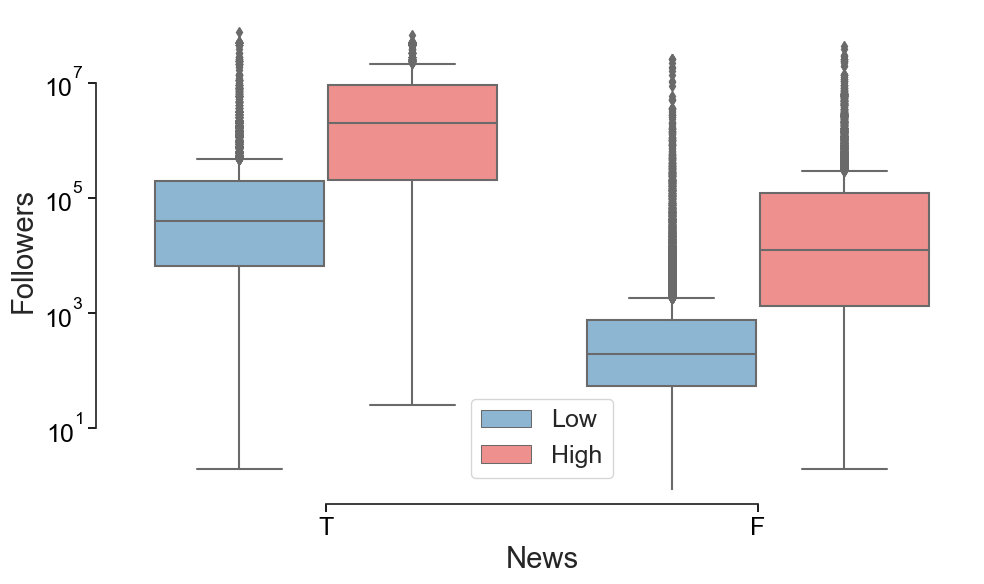

In [32]:
plot_box('followers_count', 'Followers')

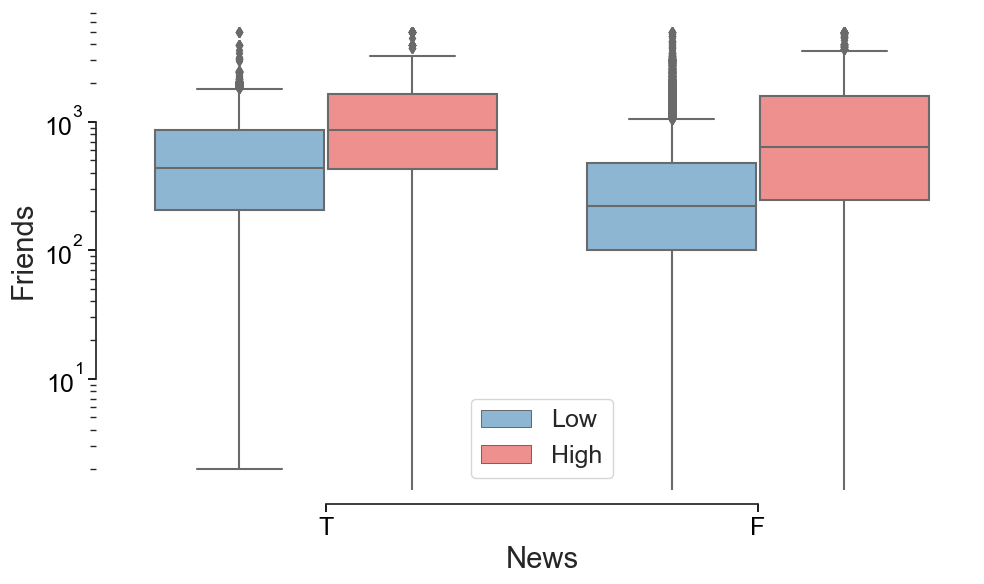

In [33]:
plot_box('friends_count', 'Friends')

In [34]:
from collections import Counter
print('All', Counter(data['have_at']))
print('HLT', Counter(HLT['have_at']))
print('HLF', Counter(HLF['have_at']))
print('LHF', Counter(LHF['have_at']))
print('T', Counter(T['have_at']))
print('F', Counter(F['have_at']))
print('L', Counter(L['have_at']))
print('H', Counter(H['have_at']))

All Counter({0: 26167, 1: 4734})
HLT Counter({0: 5856, 1: 941})
HLF Counter({0: 2942, 1: 510})
LHF Counter({0: 1033, 1: 293})
T Counter({0: 7448, 1: 1388})
F Counter({0: 18719, 1: 3346})
L Counter({0: 19939, 1: 3276})
H Counter({0: 6228, 1: 1458})


In [36]:
print('All', Counter(data['have_htag']))
print('HLT', Counter(HLT['have_htag']))
print('HLF', Counter(HLF['have_htag']))
print('LHF', Counter(LHF['have_htag']))
print('T', Counter(T['have_htag']))
print('F', Counter(F['have_htag']))
print('L', Counter(L['have_htag']))
print('H', Counter(H['have_htag']))

All Counter({0: 26699, 1: 4202})
HLT Counter({0: 5122, 1: 1675})
HLF Counter({0: 3099, 1: 353})
LHF Counter({0: 1074, 1: 252})
T Counter({0: 6467, 1: 2369})
F Counter({0: 20232, 1: 1833})
L Counter({0: 20388, 1: 2827})
H Counter({0: 6311, 1: 1375})


In [37]:
from collections import Counter
def count(var):
    print('HLT', Counter(HLT[var]))
    print('HLF', Counter(HLF[var]))
    print('LHF', Counter(LHF[var]))
    print('T', Counter(T[var]))
    print('F', Counter(F[var]))
    print('L', Counter(L[var]))
    print('H', Counter(H[var]))
    print('All', Counter(data[var]))

In [38]:
count('have_loc')

HLT Counter({0: 5548, 1: 1249})
HLF Counter({0: 2658, 1: 794})
LHF Counter({0: 1056, 1: 270})
T Counter({0: 7312, 1: 1524})
F Counter({0: 17451, 1: 4614})
L Counter({0: 18298, 1: 4917})
H Counter({0: 6465, 1: 1221})
All Counter({0: 24763, 1: 6138})


In [39]:
count('have_date')

HLT Counter({1: 3670, 0: 3127})
HLF Counter({0: 2367, 1: 1085})
LHF Counter({0: 822, 1: 504})
T Counter({1: 4661, 0: 4175})
F Counter({0: 16274, 1: 5791})
L Counter({0: 16000, 1: 7215})
H Counter({0: 4449, 1: 3237})
All Counter({0: 20449, 1: 10452})


In [40]:
count('have_url')

HLT Counter({1: 3744, 0: 3053})
HLF Counter({0: 2599, 1: 853})
LHF Counter({0: 1114, 1: 212})
T Counter({1: 4693, 0: 4143})
F Counter({0: 16701, 1: 5364})
L Counter({0: 14862, 1: 8353})
H Counter({0: 5982, 1: 1704})
All Counter({0: 20844, 1: 10057})


In [41]:
count('extraVri')

HLT Counter({0: 6795, 1: 2})
HLF Counter({0: 3370, 1: 82})
LHF Counter({0: 1146, 1: 180})
T Counter({0: 8833, 1: 3})
F Counter({0: 21402, 1: 663})
L Counter({0: 22811, 1: 404})
H Counter({0: 7424, 1: 262})
All Counter({0: 30235, 1: 666})


In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_pdf(data_list, labels, sname):
    font1 = {
        'weight' : 'normal',
        'size'   : 18,
    }
    font2 = {
        'weight' : 'normal',
        'size'   : 14,
    }
    plt.style.use('default')
    for i in range(len(data_list)):
        sns.distplot(data_list[i]['text_len'], 
                     hist=False, 
                     kde_kws={"lw": 3, "shade": False}, 
                     label=labels[i])

    plt.xlabel('Length', font1, color = 'black')
    plt.ylabel('PDF', font1, color = 'black')
    plt.tick_params(labelsize=14, colors='black')
    plt.legend(prop=font1)
    plt.tight_layout()
    plt.savefig('images/textlen-pdf-'+ sname + '.pdf')
    plt.savefig('images/textlen-pdf-'+ sname + '.jpg', dpi=600)
    plt.show()

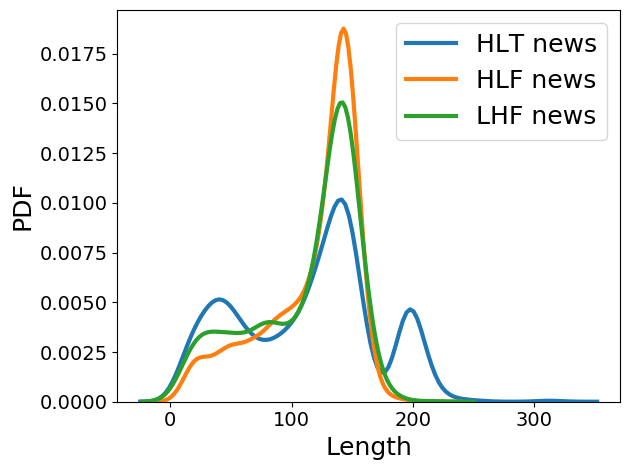

In [8]:
plot_pdf([HLT, HLF, LHF], ['HLT news', 'HLF news', 'LHF news'], '1')

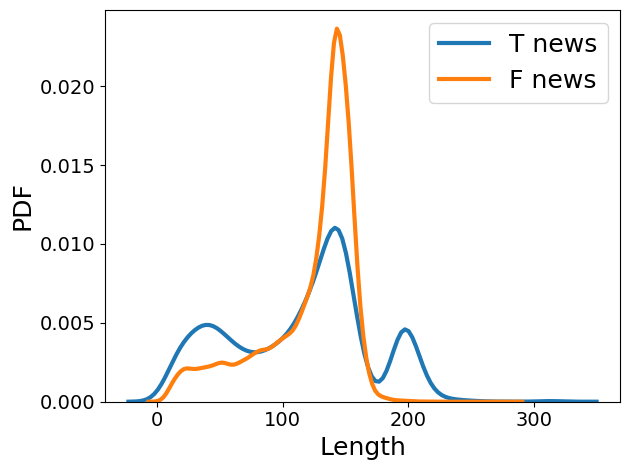

In [9]:
plot_pdf([T, F], ['T news', 'F news'], '2')

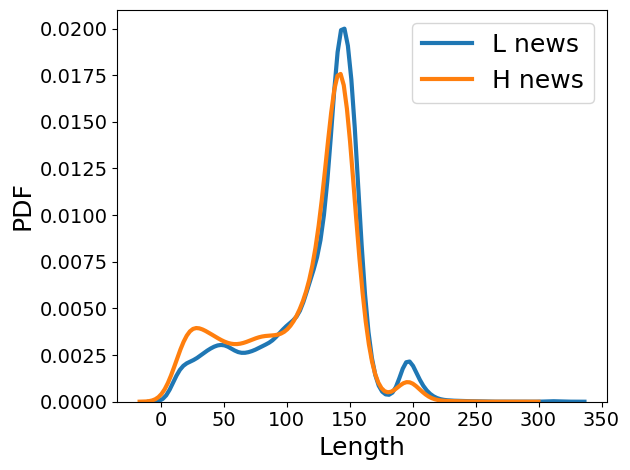

In [10]:
plot_pdf([L, H], ['L news', 'H news'], '3')

In [22]:
from collections import Counter
def count_pd(var):
    c1 = dict(Counter(HLT[var]))
    c2 = dict(Counter(HLF[var]))
    c3 = dict(Counter(LHF[var]))
    c4 = dict(Counter(T[var]))
    c5 = dict(Counter(F[var]))
    c6 = dict(Counter(L[var]))
    c7 = dict(Counter(H[var]))
    c8 = dict(Counter(data[var]))
    c = pd.DataFrame([c1, c2, c3, c4, c5, c6, c7, c8])
    c = c.drop('-1', axis=1)
    c.columns = ['Entertainment', 'Finance', 'International', 'Military', 'Society', 'Sports', 'Technology']
    c = c.T
    c.columns = ['HLT news', 'HLF news', 'LHF news', 'T news', 'F news', 'L news', 'H news', 'All']
    c = c/c.sum()
    return c
topic_pd = count_pd('topic')

In [23]:
topic_pd.index.values

array(['Entertainment', 'Finance', 'International', 'Military', 'Society',
       'Sports', 'Technology'], dtype=object)

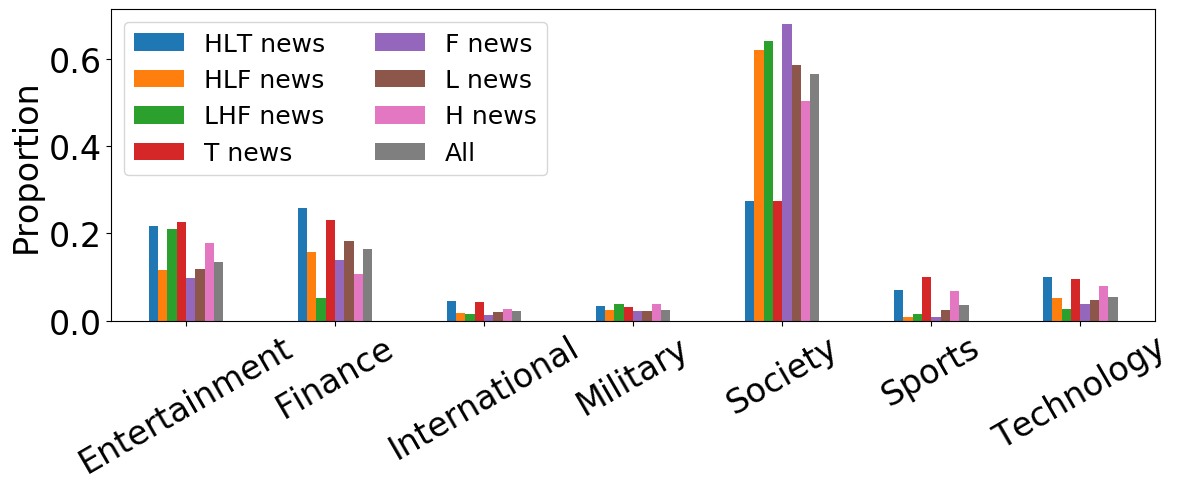

In [25]:
labels = ['HLT news', 'HLF news', 'LHF news', 'T news', 'F news', 'L news', 'H news', 'All']
ticks = list(topic_pd.index.values)
markers = [ 's', 'p', 'P', '*', 'h', 'H', '+', 'x', 'X', 'D', 'd', '|', '_']
plt.style.use('default')
topic_pd.plot(kind='bar', figsize=(12,5))
plt.legend(fontsize=18, ncol=2)
plt.ylabel('Proportion', fontsize=24)
plt.xticks(rotation=30)
plt.tick_params(labelsize=24, colors='black')
plt.tight_layout()
plt.savefig('images/topics.pdf')
plt.savefig('images/topics.jpg', dpi=600)